In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(style='white')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_borowwer_data.csv to loan_borowwer_data.csv


In [ ]:
loan_data=pd.read_csv('loan_borowwer_data.csv')

In [ ]:
loan_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
print(loan_data.describe)

<bound method NDFrame.describe of       credit.policy             purpose  ...  pub.rec  not.fully.paid
0                 1  debt_consolidation  ...        0               0
1                 1         credit_card  ...        0               0
2                 1  debt_consolidation  ...        0               0
3                 1  debt_consolidation  ...        0               0
4                 1         credit_card  ...        0               0
...             ...                 ...  ...      ...             ...
9573              0           all_other  ...        0               1
9574              0           all_other  ...        0               1
9575              0  debt_consolidation  ...        0               1
9576              0    home_improvement  ...        0               1
9577              0  debt_consolidation  ...        0               1

[9578 rows x 14 columns]>


## Exploratory Data Analysis

#### Credit policy distribution

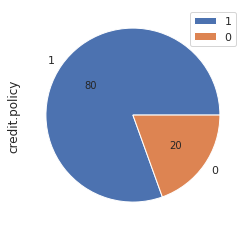

In [ ]:
loan_data['credit.policy'].value_counts().plot(kind='pie', autopct='%.f',legend=True)

#### Purpose

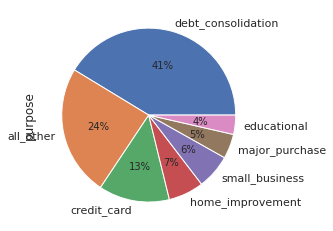

In [ ]:
loan_data['purpose'].value_counts().plot.pie(autopct='%.f%%')
plt.show()

#### Analysing every other similar feature one by one

In [ ]:
numeric_eda=['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']
bar_eda=['purpose','inq.last.6mths','delinq.2yrs','pub.rec']

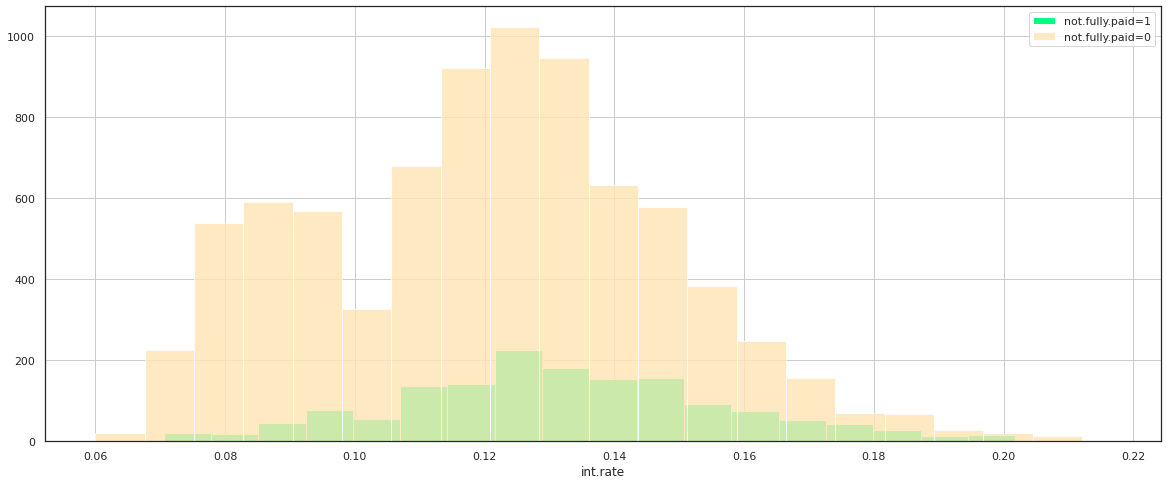

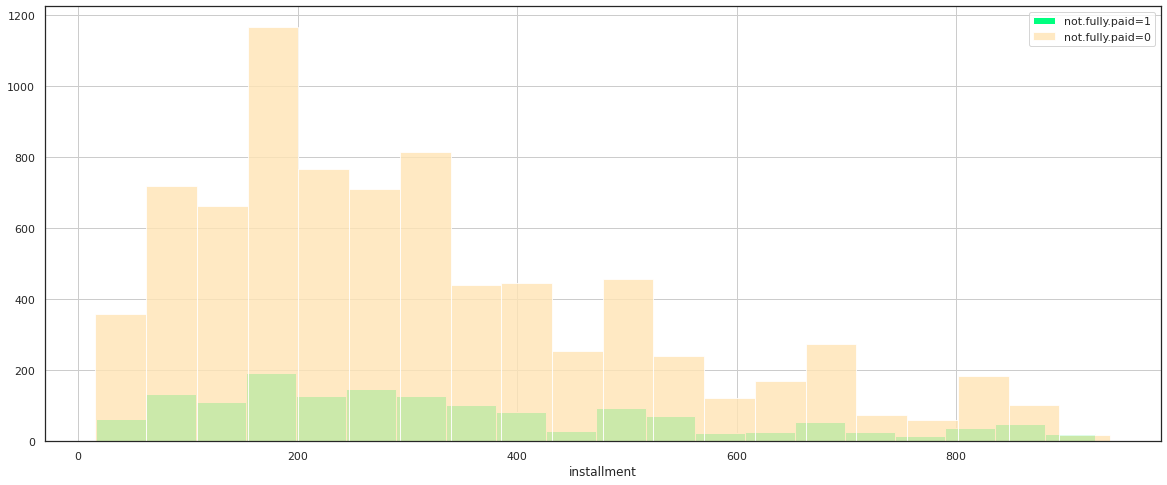

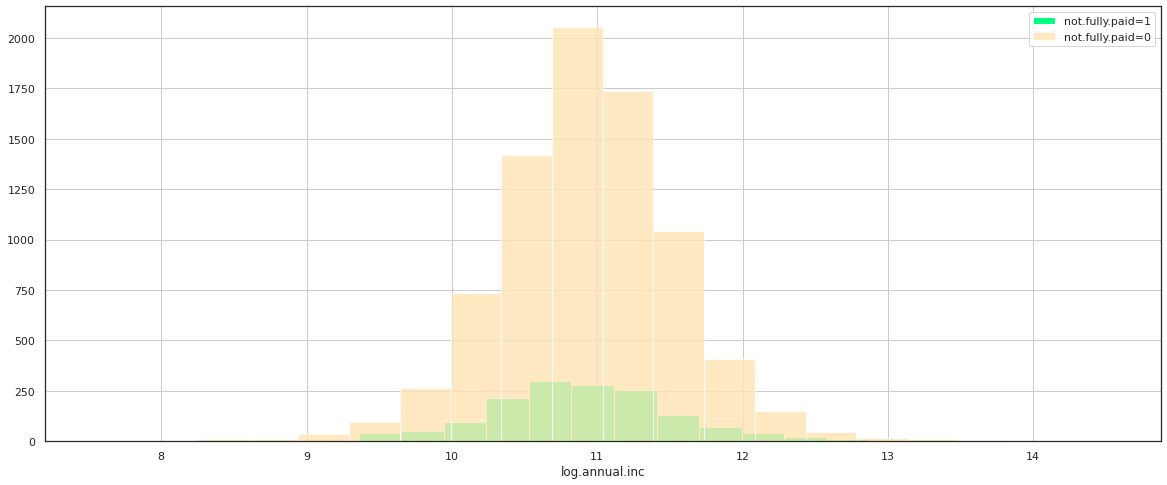

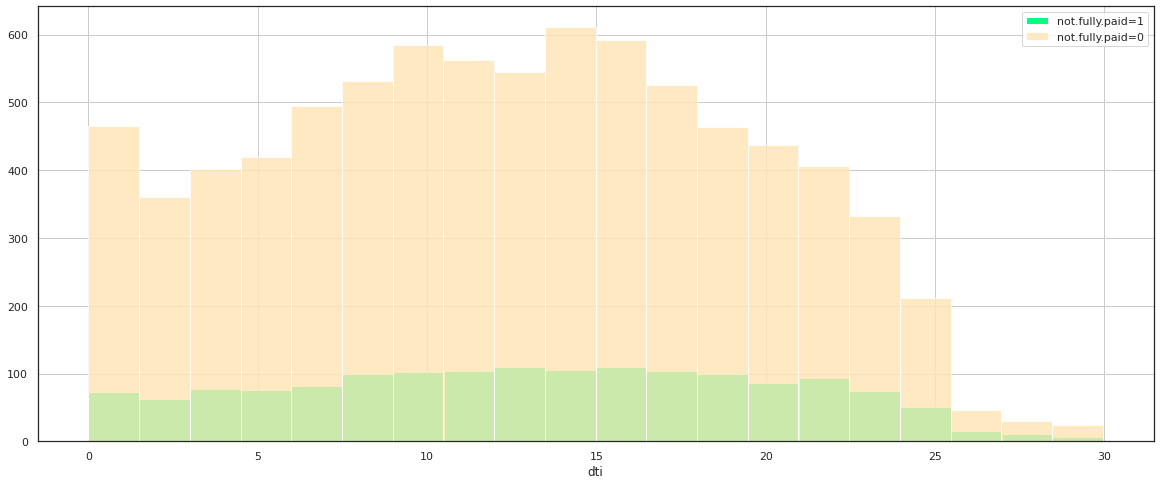

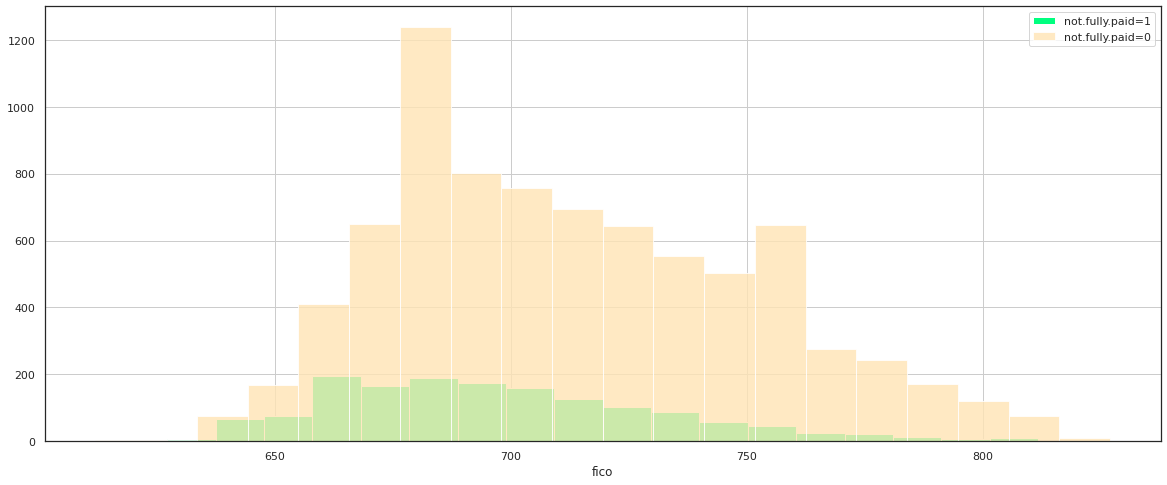

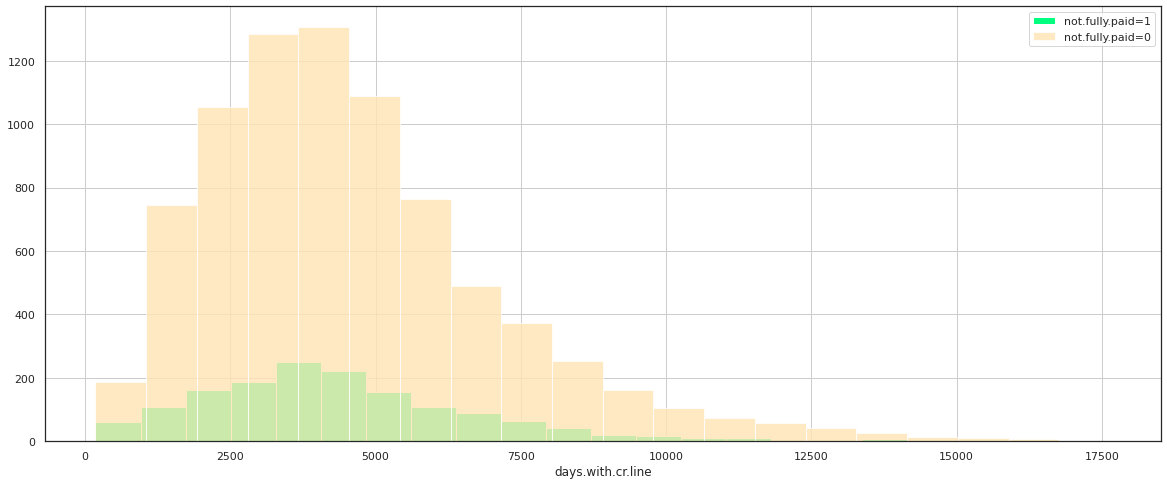

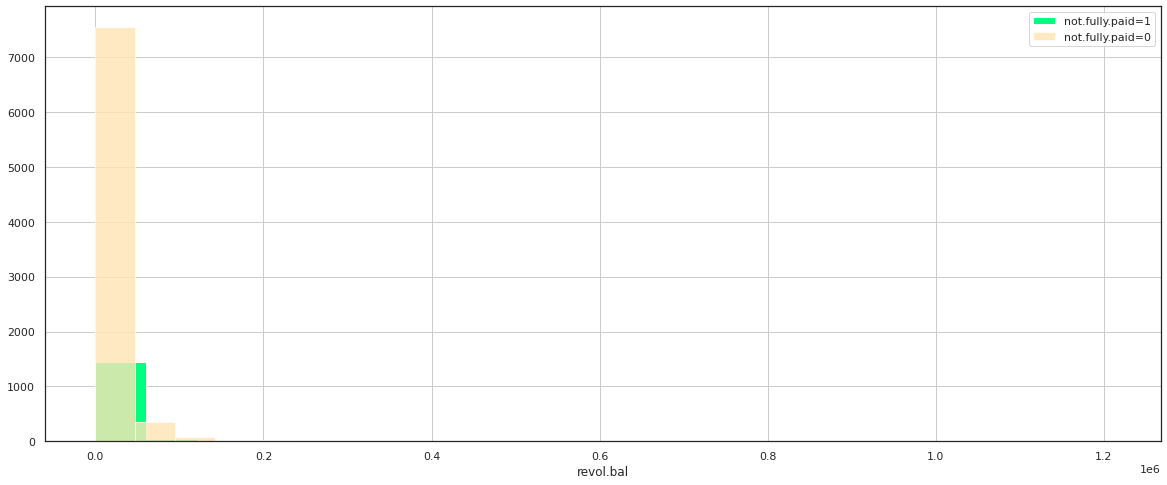

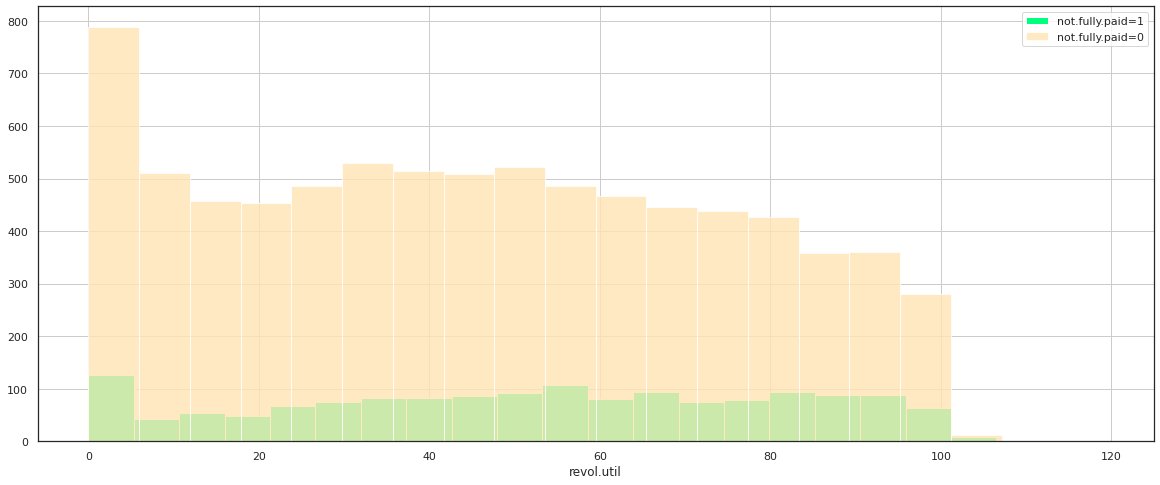

In [ ]:
for feature in numeric_eda:
    plt.figure(figsize=(20,8))
    loan_data[loan_data['not.fully.paid']==1][feature].hist(alpha=1,color='springgreen',bins=20,label='not.fully.paid=1')
    loan_data[loan_data['not.fully.paid']==0][feature].hist(alpha=0.8,color='moccasin',bins=20,label='not.fully.paid=0')
    plt.legend()
    plt.xlabel(feature)
    plt.show()

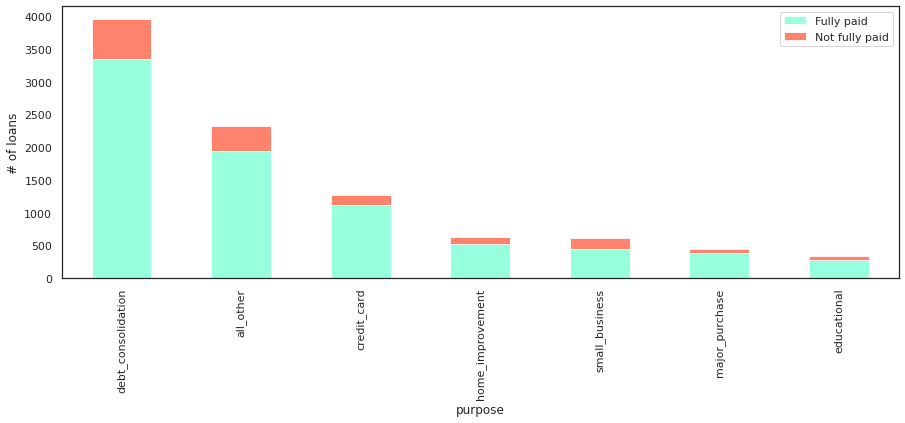

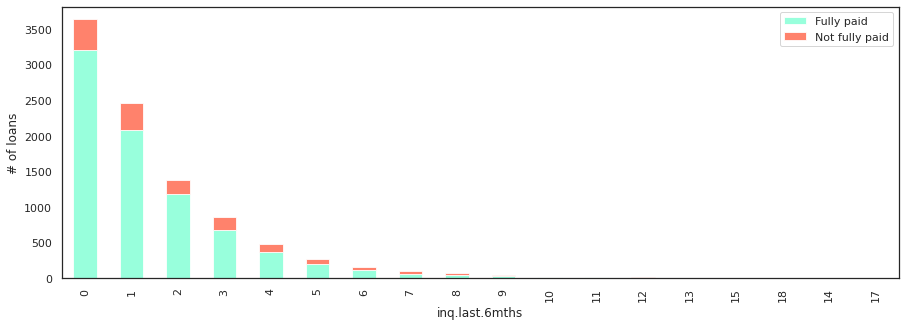

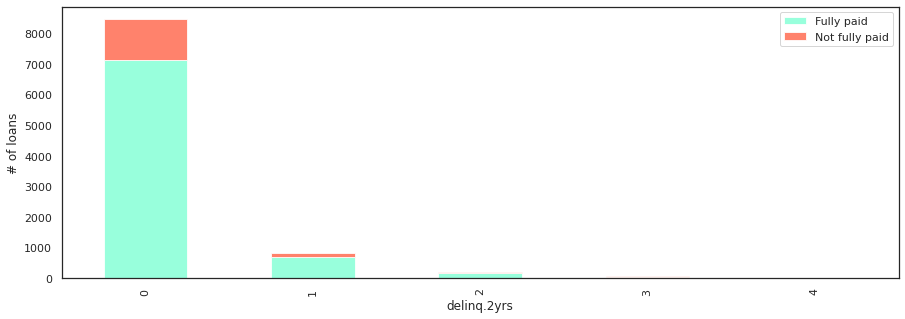

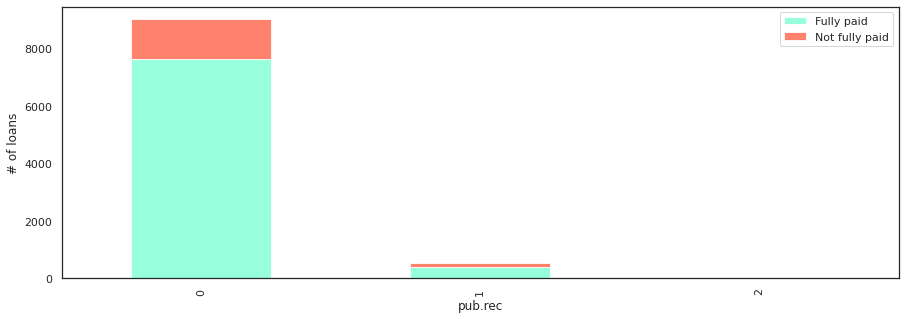

In [ ]:
for feature in bar_eda:
    ax=pd.merge(pd.DataFrame(loan_data[loan_data['not.fully.paid']==0][feature].value_counts()).rename(columns={feature:'Fully paid'}),pd.DataFrame(loan_data[loan_data['not.fully.paid']==1][feature].value_counts()).rename(columns={feature:'Not fully paid'}),left_index=True, right_index=True).plot(kind="bar",figsize=(15,5),alpha=0.8,color=['aquamarine','tomato'],stacked=True)
    ax.set_xlabel(feature)
    ax.set_ylabel("# of loans")

## Data Clean Up

In [ ]:
display(loan_data.isnull().sum())
display(loan_data.dtypes)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

We can see that purpose is an object i.e. a qualitative variable and we will need to generate dummies for this feature. Rest of the deatures are quantitative and we need to work on them to clean them up

#### One-Hot Encoding for Purpose

In [ ]:
clean_data=pd.get_dummies(loan_data,columns=['purpose'])
clean_data.drop(columns=['purpose_small_business'],inplace=True) #dropping one extra column which will not affect our information

In [ ]:
clean_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0


Lets identify the target, The target variable is not.fully.paid which means it is a loan risk i.e. target = 1 or else 0.

In [ ]:
target=clean_data['not.fully.paid']
clean_data.drop(columns=['not.fully.paid'],inplace=True)
clean_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0


### Train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(clean_data,target,test_size=0.30,random_state=101)

In [ ]:
def confusion_visual(obj):
    cf_matrix = confusion_matrix(y_test, obj.predict(x_test))
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

#### Decision Tree classifier

In [ ]:
from sklearn import tree
dtc= tree.DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
error = (1 - dtc.score(x_test, y_test))*100
print('Error: %f' % error, '%')

Error: 27.209464 %


In [ ]:
y_pred=dtc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



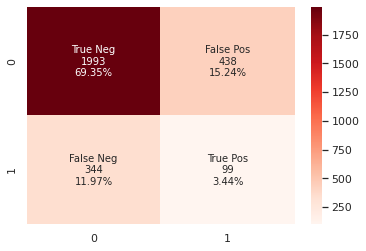

In [ ]:
confusion_visual(dtc)

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rfc.fit(x_train,y_train)
error = (1 - rfc.score(x_test, y_test))*100
print('Score  = ',rfc.score(x_test, y_test)*100, '%','\nError = %f' % error, '%')

Score  =  84.69032707028532 % 
Error = 15.309673 %


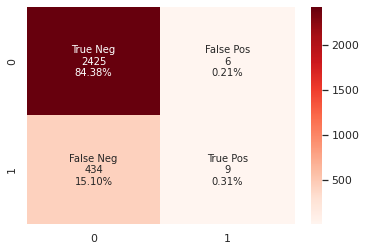

In [ ]:
confusion_visual(rfc)

#### Using gridsearchcv to find the best parameters for random forest

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=True, random_state=0,
                                    

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
print(classification_report(y_test,CV_rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

